<a href="https://colab.research.google.com/github/ankii7546/Play-Store-App-Review-Analysis/blob/main/Capstone_Project_Play_Store_App_Review_Analysis_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Google Play Store Apps Exploratory Data Analysis (EDA)**

**Introduction**

Google Play Store is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to download applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

<b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>



In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
# importing libraries
import numpy as np
import pandas as pd

In [240]:
#load the play store and user review data in Pandas dataframe
store_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/EDA/Play Store Data.csv")
review_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/EDA/User Reviews.csv")

In [241]:
#look at first 5 records of Play Store data
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [242]:
#look at a random record of Play Store data
store_df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8830,DS Tower Defence,GAME,3.2,768,1.4M,"100,000+",Free,0,Everyone,Arcade,"June 5, 2013",1.0,1.5 and up


**Description of App Dataset columns**

App : The name of the app

Category : The category of the app

Rating : The avaerage rating of the app out of 5, in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The total number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [243]:
#getting basic info about play store data
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [244]:
#we see that some of the column have missing values lets count total sum of null values
store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Data Preparation and Cleaning**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a recordset, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

From above information we see that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , and Android Ver contains null values.

In [245]:
#Cleaning Type
# Looking at the record that has Type as null
store_df[store_df['Type'].isnull()]

#dropping the record as the Rating is also null
store_df.dropna(subset = ['Type'],inplace=True)

#replacing 0 with Free
store_df['Type']=store_df['Type'].apply(lambda x: x.replace('0','Free'))

#Finding unique elements Type
store_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [246]:
#dropping the record that has Content Rating,Current version and Android version as null
store_df.dropna(subset = ['Content Rating','Current Ver','Android Ver'],inplace=True)


In [247]:
#As Rating column has more no of null values, the data would be effected if we drop all the null records. 
#Let us replace all null values of rating with mode of entire column
store_df['Rating'].fillna(float(store_df['Rating'].mode()),inplace=True)

In [248]:
#Checking if all the null values are removed
store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [249]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [250]:
# As we could see Review,Size and Installs should be integer values
#let us have look at values of these columns

#Reviews
store_df['Reviews'].unique()
store_df['Reviews']=store_df['Reviews'].apply(lambda x: (int(x)))


In [251]:
#Size
#It will be better idea to drop the Rows of the column Size having 'Varies with device' values,
#becuase it will be not a better idea to replace those value with mean or mode since, the size of some apps would be too large and some of them too small.
store_df.drop(store_df.loc[store_df['Size'] == 'Varies with device'].index, inplace=True)



In [252]:
#Converting the Size and Installs column from object to integer
#These columns contains some of the special characters like , , + , M , K.
#We need to remove all of these and then convert it to int


def convert_numeric(x):
  


  x=x.strip('+')# Removing the + Sign
  x=x.strip('$')# Removing the + Sign
  x=x.replace(',', '')# For removing the `,`
  if 'M' in x:
    x=x.strip('M')
    x=float(x)*1000000
    return int(x)
  elif 'k' in x:
    x=x.strip('k')
    x=float(x)*1000
    return int(x)
  elif '$' in x:
    return(float(x[1:]))
    

  
  return float(x)

store_df['Size']=store_df['Size'].apply(lambda x: convert_numeric(x))
store_df['Installs']=store_df['Installs'].apply(lambda x: convert_numeric(x))
store_df['Price']=store_df['Price'].apply(lambda x: convert_numeric(x))



**Exploratory Analysis and Visualization**

Exploratory Data Analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent a property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

In [253]:
#Import libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9, 5)

**Analysis 1: Categories which have most number of installs?**

In [264]:
highest_installs_df = store_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
highest_installs_df['Installs']=highest_installs_df['Installs'].apply(lambda x: int(float(x)))
highest_installs_df


,Installs
Category,
GAME,29874564253
FAMILY,6798733325
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3526594805
PRODUCTIVITY,2742312744
PHOTOGRAPHY,2557897655
SHOPPING,1504248785
SPORTS,1138949498


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7d4f913d0>],
      dtype=object)

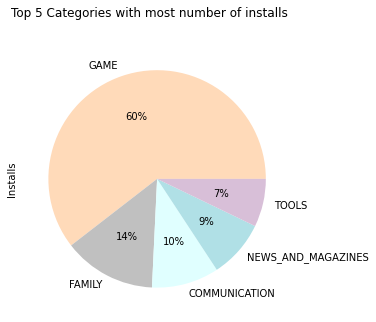

In [265]:
highest_installs_df.head(5).plot(kind='pie',autopct='%1.f%%',colors=['peachpuff','silver','lightcyan','powderblue','thistle'],title="Top 5 Categories with most number of installs",subplots=True,legend=False)

**Analysis 2: Correlation between Installs, Rating and Review**

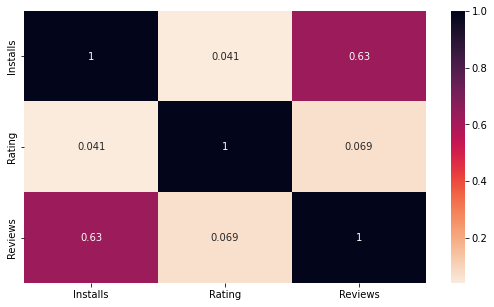

In [280]:
corr_df=store_df[['Installs','Rating','Reviews']].corr()
sns.heatmap(corr_df,cmap='rocket_r',  annot=True)

From the graph it is clear that Installs and Reviews are correlated which means that these both are directly proportional

**Analysis 3: Costliest apps on play store**

In [279]:
top10PaidApps= store_df[store_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False)[['App','Price']]
top10PaidApps.set_index[['App']]
# top10PaidApps.sort_index(inplace=True)
# type(top10PaidApps)
# plt.plot(top10PaidApps)

# plt.title('Monthly Sales in the year 2018')
# plt.ylabel('Total number of sales')
# plt.xlabel('Month')

TypeError: ignored